## Check HDF5 File
Utility notebook used when make_plots.py isn't working as expected.<br>
Open an HDF5 output of workflows/SUEP_coffea.py and check out its contents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def h5load(ifile, label):
    with pd.HDFStore(ifile, 'r') as store:
        data = store[label] 
        metadata = store.get_storer(label).attrs.metadata
        return data, metadata

In [14]:
f = '../out.hdf5'
event_vars, m = h5load(f,'vars')

In [15]:
event_vars

,ntracks_track_down,ngood_fastjets_track_down,SUEP_genMass_track_down,SUEP_genPt_track_down,SUEP_nconst_CL_track_down,SUEP_pt_avg_b_CL_track_down,SUEP_S1_CL_track_down,SUEP_pt_avg_CL_track_down,SUEP_pt_CL_track_down,SUEP_eta_CL_track_down,...,SUEP_delta_mass_genMass_CL,SUEP_delta_pt_genPt_CL,ISR_nconst_CL,ISR_pt_avg_b_CL,ISR_S1_CL,ISR_pt_avg_CL,ISR_pt_CL,ISR_eta_CL,ISR_phi_CL,ISR_mass_CL
0,113,2,0,0,63.0,5.284607,0.125365,10.995304,608.077808,-0.089195,...,340.812967,609.633879,14.0,2.930841,0.263194,17.881009,247.542071,0.711049,0.513336,51.163426
1,79,2,0,0,54.0,5.999441,0.523301,9.947338,432.234478,-0.871935,...,391.841625,434.564251,10.0,2.317061,0.078464,59.193897,591.469239,0.826722,-2.346123,32.886125
2,75,2,0,0,43.0,3.539809,0.132539,18.788415,799.041219,0.361278,...,171.414562,800.671153,17.0,2.201193,0.150403,13.799312,233.929669,-0.634695,-0.929468,43.067212
3,60,2,0,0,31.0,2.244026,0.705176,9.889174,300.170192,-0.534749,...,80.542945,303.309473,17.0,2.803494,0.219908,38.915614,661.140029,0.746919,2.064267,57.899485
4,118,2,0,0,69.0,3.144730,0.307256,7.521754,455.356611,1.136528,...,407.388026,458.893801,36.0,2.848722,0.411942,12.205393,431.950802,-0.009135,1.061029,112.971958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46459,129,2,0,0,71.0,5.095835,0.435639,11.795960,748.016308,0.436709,...,470.163018,751.125555,32.0,2.187589,0.122190,7.006912,219.445877,-0.346127,1.730596,112.585884
46460,133,2,0,0,57.0,4.826153,0.343493,11.388689,590.525210,-0.145897,...,287.308030,593.621351,49.0,3.522816,0.433819,14.895543,711.120252,1.492836,1.986793,196.741089
46461,215,4,0,0,54.0,1.527564,0.267052,9.025383,481.491070,0.933661,...,135.437213,482.282491,43.0,1.524930,0.551087,9.422500,402.327023,-0.883552,1.977598,113.278686
46462,141,3,0,0,50.0,8.174794,0.168990,18.769935,860.596845,-0.254522,...,423.975159,860.596845,28.0,1.198361,0.489046,17.042745,473.995614,1.936644,0.883357,64.598855


In [16]:
for key in event_vars:
    if "prefire" not in key: continue
    print(key)

prefire_nom
prefire_up
prefire_down


In [17]:
event_vars['prefire_nom']

0        1.000000
1        1.000000
2        1.000000
3        1.000000
4        1.000000
           ...   
46459    1.000000
46460    0.987221
46461    1.000000
46462    0.999749
46463    0.999997
Name: prefire_nom, Length: 46464, dtype: float32

In [20]:
x = event_vars['prefire_nom']

(array([1.5000e+01, 5.3000e+01, 1.3800e+02, 6.7000e+01, 1.1200e+02,
        3.5000e+02, 1.9100e+02, 5.3200e+02, 9.1700e+02, 4.4089e+04]),
 array([0.17965837, 0.26169252, 0.3437267 , 0.42576087, 0.50779504,
        0.5898292 , 0.6718633 , 0.7538975 , 0.83593166, 0.9179658 ,
        1.        ], dtype=float32),
 <BarContainer object of 10 artists>)

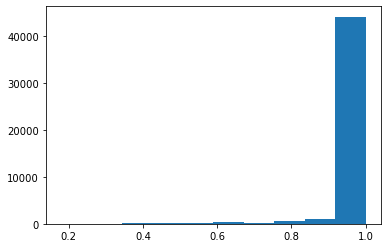

In [21]:
plt.hist(x)

64909205.15625
64774388.28125


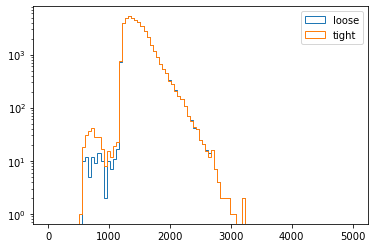

In [35]:
plt.hist(htloose, bins=np.linspace(0,5000,100),  histtype='step', label='loose')
plt.hist(httight, bins=np.linspace(0,5000,100), histtype='step', label='tight')
plt.yscale('log')
plt.legend()
print(np.sum(htloose))
print(np.sum(httight))